In [70]:
import pandas as pd

# EDA & Staff

In [71]:
#Load train & test
table_train = pd.read_csv('data/train.csv')
table_test = pd.read_csv('data/test.csv')

In [72]:
#Checking train & test shape
table_train.shape, table_test.shape

((101763, 23), (67842, 22))

In [73]:
#First look at the table
table_train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
table_train.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [6]:
#target: Boolean to int (Let's make our work easier later)
table_train['defects'] = table_train['defects'].astype('int')

In [7]:
#Let's mark train & test data
table_train['sample'] = 'train'
table_test['sample'] = 'test'

In [8]:
#Prefer to see all columns
pd.set_option('display.max_columns', 30);

In [9]:
#Concat table & test (that's why we marked ones) to commit all changes to the entire dataset
table_all = pd.concat([table_train, table_test], ignore_index=True)

table_all.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,sample
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0.0,train
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0.0,train
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0.0,train
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1.0,train
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0.0,train


In [11]:
#Checking shape
table_all.shape

(169605, 24)

In [12]:
#Unique values /// (rows total - 169605)
table_all.nunique()

id                   169605
loc                     392
v(g)                    110
ev(g)                    74
iv(g)                    87
n                       873
v                      4860
l                        55
d                      3644
i                      5567
e                      9934
b                       332
t                      9771
lOCode                  312
lOComment                93
lOBlank                 101
locCodeAndComment        32
uniq_Op                  73
uniq_Opnd               186
total_Op                661
total_Opnd              500
branchCount             151
defects                   2
sample                    2
dtype: int64

https://www.kaggle.com/datasets/semustafacevik/software-defect-prediction
1. loc             : numeric % McCabe's line count of code
2. v(g)            : numeric % McCabe "cyclomatic complexity"
3. ev(g)           : numeric % McCabe "essential complexity"
4. iv(g)           : numeric % McCabe "design complexity"
5. n               : numeric % Halstead total operators + operands
6. v               : numeric % Halstead "volume"
7. l               : numeric % Halstead "program length"
8. d               : numeric % Halstead "difficulty"
9. i               : numeric % Halstead "intelligence"
10. e               : numeric % Halstead "effort"
11. b               : numeric % Halstead 
12. t               : numeric % Halstead's time estimator
13. lOCode          : numeric % Halstead's line count
14. lOComment       : numeric % Halstead's count of lines of comments
15. lOBlank         : numeric % Halstead's count of blank lines
16. lOCodeAndComment: numeric
17. uniq_Op         : numeric % unique operators
18. uniq_Opnd       : numeric % unique operands
19. total_Op        : numeric % total operators
20. total_Opnd      : numeric % total operands
21: branchCount     : numeric % of the flow graph
22. defects         : {false,true} % module has/has not one or more  reported defects

In [13]:
#IsNA checking
table_all.isna().sum()

id                       0
loc                      0
v(g)                     0
ev(g)                    0
iv(g)                    0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
locCodeAndComment        0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
defects              67842
sample                   0
dtype: int64

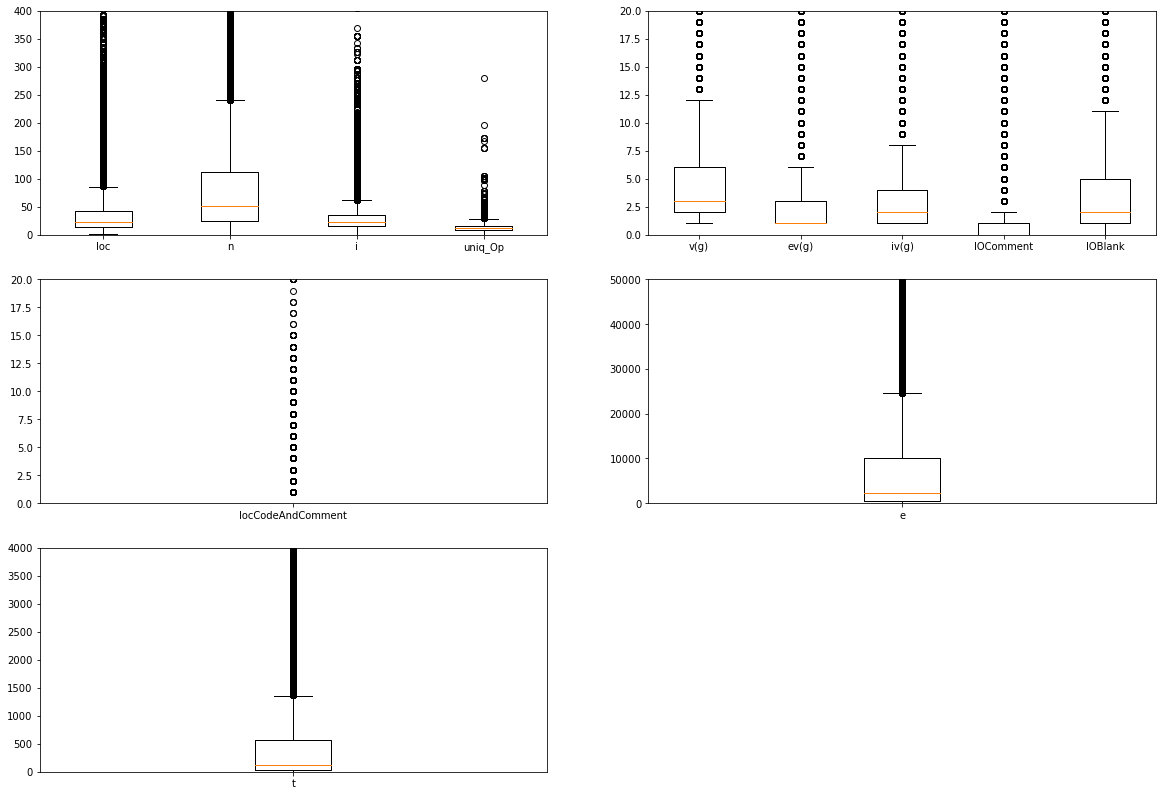

In [14]:
#Let's plot!
#Simple boxplot

import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(20, 14)

ax_1 = fig.add_subplot(3, 2, 1)
plt.boxplot(
    [table_all['loc'],
    table_all['n'],
    table_all['i'],
    table_all['uniq_Op'],
    ],
    labels=['loc', 'n', 'i', 'uniq_Op']
)
plt.ylim(0, 400)

ax_2 = fig.add_subplot(3, 2, 2)
plt.boxplot(
    [table_all['v(g)'],
    table_all['ev(g)'],
    table_all['iv(g)'],
    table_all['lOComment'],
    table_all['lOBlank'],
    ],
    labels=['v(g)', 'ev(g)', 'iv(g)', 'lOComment', 'lOBlank']
)
plt.ylim(0, 20)

ax_3 = fig.add_subplot(3, 2, 3)
plt.boxplot(
    [table_all['locCodeAndComment'],
    ],
    labels=['locCodeAndComment']
)
plt.ylim(0, 20)

ax_4 = fig.add_subplot(3, 2, 4)
plt.boxplot(
    [table_all['e'],
    ],
    labels=['e']
)
plt.ylim(0, 50000)

ax_5 = fig.add_subplot(3, 2, 5)
plt.boxplot(
    [table_all['t'],
    ],
    labels=['t']
)
plt.ylim(0, 4000)

plt.show()

In [15]:
#Class Distribution (False, True)
table_train.loc[table_all['defects'] == 0].shape[0], table_train.loc[table_all['defects'] == 1].shape[0]

(78699, 23064)

# Absolute Correlations

In [16]:
### Absolute Correlations

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(table_all.drop(['defects', 'sample'], axis=1), 30))

Top Absolute Correlations
v(g)       branchCount    0.973868
n          total_Op       0.964083
total_Op   total_Opnd     0.961136
n          total_Opnd     0.956867
b          total_Opnd     0.946431
v          b              0.943433
b          total_Op       0.939513
v          total_Opnd     0.938480
n          b              0.936024
v          total_Op       0.936019
n          v              0.935390
lOCode     total_Opnd     0.914852
           total_Op       0.912706
n          lOCode         0.907777
b          lOCode         0.896289
v          lOCode         0.894356
uniq_Opnd  total_Opnd     0.841986
e          t              0.840220
lOCode     uniq_Opnd      0.834319
n          uniq_Opnd      0.822734
i          uniq_Opnd      0.818713
uniq_Opnd  total_Op       0.814989
d          total_Op       0.812439
b          uniq_Opnd      0.811884
loc        lOCode         0.811817
v(g)       iv(g)          0.809481
n          d              0.806256
v          uniq_Opnd      0.8

Okay, let's try to drop some of the most correlated columns (> 0.90) , such as:
- branchCount
- total_Op
- total_Opnd
- b
- v


#########################

and others (>0.80) as well:
- lOCode
- t
- uniq_Opnd
- iv(g)
- d

Didn't performed well, so 1st variant (>0.90) used in the final

#########################

In [17]:
#col_to_drop = ['branchCount', 'total_Op', 'total_Opnd', 'b', 'v', 'lOCode', 't', 'uniq_Opnd', 'iv(g)', 'd' ] #>0.8
col_to_drop = ['branchCount', 'total_Op', 'total_Opnd', 'b', 'v' ] #>0.9

table_all = table_all.drop(col_to_drop, axis=1)

table_all.head()

,id,loc,v(g),ev(g),iv(g),n,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects,sample
0,0,22.0,3.0,1.0,2.0,60.0,0.06,19.56,14.25,5448.79,302.71,17,1,1,0,16.0,9.0,0.0,train
1,1,14.0,2.0,1.0,2.0,32.0,0.14,7.00,21.11,936.71,52.04,11,0,1,0,11.0,11.0,0.0,train
2,2,11.0,2.0,1.0,2.0,45.0,0.11,8.05,22.76,1754.01,97.45,8,0,1,0,12.0,11.0,0.0,train
3,3,8.0,1.0,1.0,1.0,23.0,0.19,5.25,17.86,473.66,26.31,4,0,2,0,8.0,6.0,1.0,train
4,4,11.0,2.0,1.0,2.0,17.0,0.18,5.63,12.44,365.67,20.31,7,0,2,0,7.0,6.0,0.0,train


In [18]:
#Let's check Absolute Correlations again
print("Top Absolute Correlations")
print(get_top_abs_correlations(table_all.drop(['defects', 'sample'], axis=1), 30))

Top Absolute Correlations
n        lOCode       0.907777
e        t            0.840220
lOCode   uniq_Opnd    0.834319
n        uniq_Opnd    0.822734
i        uniq_Opnd    0.818713
loc      lOCode       0.811817
v(g)     iv(g)        0.809481
n        d            0.806256
d        uniq_Op      0.781614
         lOCode       0.780587
loc      v(g)         0.767416
n        lOBlank      0.763842
lOCode   lOBlank      0.762890
loc      n            0.760904
n        i            0.732153
v(g)     ev(g)        0.731256
loc      iv(g)        0.705947
lOBlank  uniq_Opnd    0.704581
i        lOCode       0.687814
uniq_Op  uniq_Opnd    0.686202
d        uniq_Opnd    0.683742
loc      lOBlank      0.665552
d        lOBlank      0.659156
v(g)     lOCode       0.656278
loc      uniq_Opnd    0.648063
i        lOBlank      0.644739
iv(g)    lOCode       0.639048
lOCode   uniq_Op      0.634554
v(g)     n            0.625686
n        uniq_Op      0.615019
dtype: float64


# Categorical features 

In [20]:
#locCodeAndComment
#Total unique values - 32
table_all['locCodeAndComment'].nunique()

32

In [21]:
#Seems to be categorical feature
table_all['locCodeAndComment'].unique()

array([ 0,  1,  2,  3, 12,  4, 13,  6,  5,  8,  7, 10,  9, 11, 38, 20, 15,
       22, 19, 14, 24, 43, 23, 16, 28, 18, 26, 17, 32, 34, 30, 42],
      dtype=int64)

In [22]:
#lOBlank, lOComment and uniq_Op - categorical features as well
#Total unique values - 94, 91, 70
table_all['lOBlank'].nunique(), table_all['lOComment'].nunique(), table_all['uniq_Op'].nunique()

(101, 93, 73)

In [23]:
table_all['lOBlank'].unique()

array([  1,   2,   3,   0,   5,  11,   9,   8,  12,   6,  10,   4,  15,
         7,  14,  16,  17,  13,  20,  42,  19,  24,  29,  23,  21,  43,
        18,  40,  39,  38,  26,  70,  41,  28,  27,  47,  67, 102,  22,
        49,  33,  25,  89,  34,  44,  32,  92,  30,  31,  36,  37,  50,
        72,  35, 164, 106,  55,  93,  75,  56,  59, 202,  46,  64,  54,
        74,  79,  69,  48,  78, 114,  80,  45,  65,  66,  63, 143,  86,
       219,  53,  58,  76,  61, 135,  52,  51, 101,  84, 133,  83, 129,
        73, 104, 154,  57, 130,  88, 146, 343, 105, 447], dtype=int64)

In [24]:
#########################
#ADDITIONAL (for >0.8 CORR)
table_all['lOCode'].nunique(), table_all['uniq_Opnd'].nunique()
#########################

(312, 186)

In [25]:
#Mean-target encoding 
#cat_col = ['locCodeAndComment', 'lOBlank', 'lOComment', 'uniq_Op']
cat_col = ['locCodeAndComment', 'lOBlank', 'lOComment', 'uniq_Op', 'lOCode', 'uniq_Opnd']
for col in cat_col:
    mean_target = table_all.groupby(col)['defects'].mean()
    table_all[col] = table_all[col].map(mean_target)

In [26]:
table_all.head()

,id,loc,v(g),ev(g),iv(g),n,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects,sample
0,0,22.0,3.0,1.0,2.0,60.0,0.06,19.56,14.25,5448.79,302.71,0.140379,0.218323,0.068280,0.20977,0.248482,0.090889,0.0,train
1,1,14.0,2.0,1.0,2.0,32.0,0.14,7.00,21.11,936.71,52.04,0.097591,0.179270,0.068280,0.20977,0.123988,0.117388,0.0,train
2,2,11.0,2.0,1.0,2.0,45.0,0.11,8.05,22.76,1754.01,97.45,0.085721,0.179270,0.068280,0.20977,0.131040,0.117388,0.0,train
3,3,8.0,1.0,1.0,1.0,23.0,0.19,5.25,17.86,473.66,26.31,0.075101,0.179270,0.133841,0.20977,0.091796,0.074907,1.0,train
4,4,11.0,2.0,1.0,2.0,17.0,0.18,5.63,12.44,365.67,20.31,0.079939,0.179270,0.133841,0.20977,0.077375,0.074907,0.0,train


In [28]:
#Let's cut some extreme values

#col_list = ['loc', 'ev(g)', 'n', 'i', 'e']
col_list = ['loc', 'ev(g)', 'iv(g)', 'n', 'i', 'e', 'd', 't']

for col in col_list:
    
    
    q_max = table_all[col].quantile(0.95) #Cutting >0.95 values
    q_min = table_all[col].quantile(0.05) #Cutting <0.05 values
    table_all.loc[(table_all[col] >= q_max), col] = q_max
    table_all.loc[(table_all[col] <= q_min), col] = q_min

# Back to Train & Test

In [30]:
#Separating dataset back again
train = table_all.loc[table_all['sample'] == 'train'].drop('sample', axis=1)
test = table_all.loc[table_all['sample'] == 'test'].drop('sample', axis=1)

In [31]:
#IsNA check
test.isna().sum()

id                       0
loc                      0
v(g)                     0
ev(g)                    0
iv(g)                    0
n                        0
l                        0
d                        0
i                        0
e                        0
t                        0
lOCode                  18
lOComment                2
lOBlank                 13
locCodeAndComment       10
uniq_Op                  3
uniq_Opnd               11
defects              67842
dtype: int64

In [32]:
#test[test['lOCode'].isnull()]
#test.loc[(test[col].isnull())]

In [33]:
none_col = ['lOCode', 
            'lOComment', 
            'lOBlank',
            'locCodeAndComment',
            'uniq_Op',         
            'uniq_Opnd']

for col in none_col:
    
    #test.loc[(test[col] == 'None'), col] = test[col].mode()[0]
    test.loc[(test[col].isnull()), col] = test[col].mode()[0]

In [34]:
#Int Target is more preferable. Just in case, we reassign the data type

train['defects'] = train['defects'].astype(int)

train.head(3)

,id,loc,v(g),ev(g),iv(g),n,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects
0,0,22.0,3.0,1.0,2.0,60.0,0.06,19.56,14.25,5448.79,302.71,0.140379,0.218323,0.06828,0.20977,0.248482,0.090889,0
1,1,14.0,2.0,1.0,2.0,32.0,0.14,7.00,21.11,936.71,52.04,0.097591,0.179270,0.06828,0.20977,0.123988,0.117388,0
2,2,11.0,2.0,1.0,2.0,45.0,0.11,8.05,22.76,1754.01,97.45,0.085721,0.179270,0.06828,0.20977,0.131040,0.117388,0


In [35]:
#IsNA check
test.isna().sum()

id                       0
loc                      0
v(g)                     0
ev(g)                    0
iv(g)                    0
n                        0
l                        0
d                        0
i                        0
e                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
locCodeAndComment        0
uniq_Op                  0
uniq_Opnd                0
defects              67842
dtype: int64

In [36]:
test.head(3)

,id,loc,v(g),ev(g),iv(g),n,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects
101763,101763,33.0,5.0,1.0,4.0,144.0,0.04,26.96,30.05,22636.74,1257.600,0.295285,0.179270,0.148833,0.209770,0.498590,0.322384,NaN
101764,101764,27.0,8.0,8.0,2.0,125.0,0.04,22.82,27.22,14482.46,804.580,0.211454,0.179270,0.133841,0.209770,0.327042,0.250453,NaN
101765,101765,113.0,11.0,7.0,10.0,315.0,0.02,37.83,61.98,66825.00,3712.438,0.637363,0.448702,0.669377,0.332149,0.626685,0.622222,NaN


# Training (NN)  - Transformers

In [38]:
#Transformer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer

pipeline = make_pipeline(

    QuantileTransformer(output_distribution = 'normal',random_state = 42),
    StandardScaler()
)

In [39]:
#Transformer

from sklearn.compose import make_column_selector, make_column_transformer
import numpy as np

transformer = make_column_transformer(
    (
        pipeline,
        make_column_selector(dtype_include=np.number) # We want to apply numerical_pipeline only on numerical columns
    ),
    remainder = 'passthrough',
    verbose_feature_names_out=False
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('quantiletransformer',
                                                  QuantileTransformer(output_distribution='normal',
                                                                      random_state=42)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF971DE0A0>)],
                  verbose_feature_names_out=False)

In [40]:
train.head(3)

,id,loc,v(g),ev(g),iv(g),n,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects
0,0,22.0,3.0,1.0,2.0,60.0,0.06,19.56,14.25,5448.79,302.71,0.140379,0.218323,0.06828,0.20977,0.248482,0.090889,0
1,1,14.0,2.0,1.0,2.0,32.0,0.14,7.00,21.11,936.71,52.04,0.097591,0.179270,0.06828,0.20977,0.123988,0.117388,0
2,2,11.0,2.0,1.0,2.0,45.0,0.11,8.05,22.76,1754.01,97.45,0.085721,0.179270,0.06828,0.20977,0.131040,0.117388,0


In [41]:
#Data & target
X = train.drop(['defects', 'id'], axis=1)
y = train['defects']

In [42]:
#Transformer applied
import torch

X_tf_tns = torch.from_numpy(transformer.fit_transform(X))
y_tns = torch.tensor(y.values).unsqueeze(dim=1)

In [43]:
#Checking shapes of tensors
X_tf_tns.shape, y_tns.shape

(torch.Size([101763, 16]), torch.Size([101763, 1]))

In [44]:
#(1) Create Dataser 
#(2) Split Dataset

from torch.utils.data import TensorDataset
from torch.utils.data import random_split

dataset = TensorDataset(X_tf_tns, y_tns)
train_dataset, test_dataset = random_split(dataset, (int(len(dataset) * 0.7), len(dataset) - int(len(dataset) * 0.7)))

In [45]:
train_dataset[0]

(tensor([ 0.4069,  0.4692, -0.6152,  0.2337,  0.4699, -0.3270,  0.5733,  0.2579,
          0.5365,  0.5369,  0.5532,  1.0549,  0.7054,  3.2199,  0.6681,  0.5094],
        dtype=torch.float64),
 tensor([0], dtype=torch.int32))

In [46]:
#Lets create Dataloader
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, pin_memory=True, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=64, pin_memory=True, shuffle=False)

In [47]:
#That's it
train_loader

# Training (NN)  - Training/Eval Functions

In [48]:
import torch.nn as nn
from tqdm import tqdm

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(model: nn.Module, loader: DataLoader):
    model.train()

    train_loss = 0
    train_accuracy = 0
    
    for x, y in tqdm(loader):
        
        x, y = x.to(device), y.to(device)
        x, y = x.float(), y.float()
        
        optimizer.zero_grad()

        output = little_model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()
        train_accuracy += binary_accuracy(output, y).cpu()

        loss.backward()

        optimizer.step()

    train_loss /= len(loader)
    train_accuracy /= len(loader)   
    
    #train_loss, train_accuracy = train_loss.cpu().numpy(), train_accuracy.cpu().numpy()
    
    return train_loss, train_accuracy

In [49]:
@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader):
    model.eval()

    total_loss = 0
    total_accuracy = 0
    
    for x, y in tqdm(loader, desc='Evaluation'):
        
        x, y = x.to(device), y.to(device)
        x, y = x.float(), y.float()
        
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()
        total_accuracy += binary_accuracy(output, y).cpu()

    total_loss /= len(loader)
    total_accuracy /= len(loader)
    
    #total_loss, total_accuracy = total_loss.np(), total_accuracy.numpy()

    return total_loss, total_accuracy

In [50]:
#Plotting
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    train_accuracy: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()
    
    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')
    
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Valid accuracy')
    plt.legend()
    plt.grid()

    plt.show()

In [51]:
#Training cycle
def whole_train_valid_cycle(model, num_epochs, title):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader)
        valid_loss, valid_accuracy = evaluate(model, valid_loader)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()
        
        #print(train_loss_history, valid_loss_history)
        #print(train_accuracy_history, valid_accuracy_history)

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )
        
        if valid_accuracy > 0.815:
            break
        
    print(f'final accuracy: train: {train_accuracy}, valid: {valid_accuracy}')

# Training (NN)  - NN model

In [52]:
#NN model itself
import torch.nn as nn

little_model = nn.Sequential(
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(4, 1)   
)

In [53]:
#Trained on CUDA in my case
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
print(torch.cuda.get_device_name())

cuda:0
NVIDIA GeForce RTX 3080


In [54]:
from torch.optim import Adam

little_model = little_model.to(device)
optimizer = Adam(little_model.parameters(), lr=5e-4)
loss_fn = nn.BCEWithLogitsLoss()

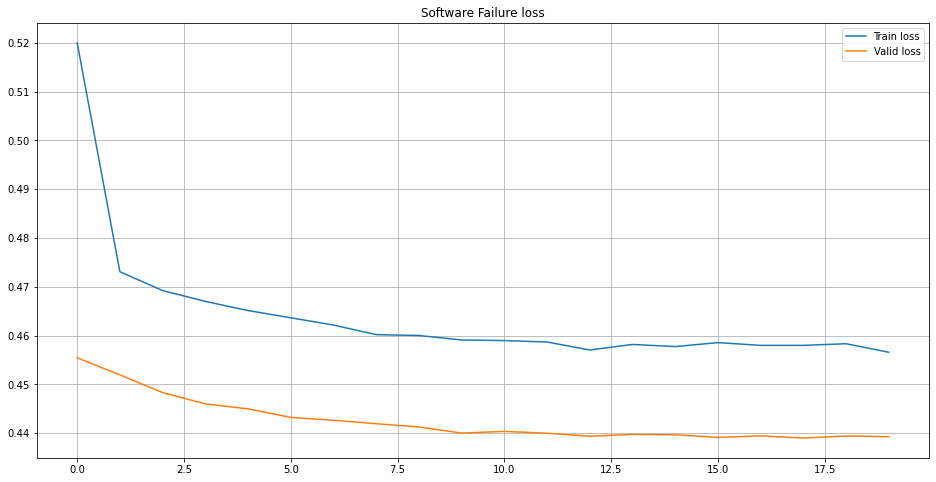

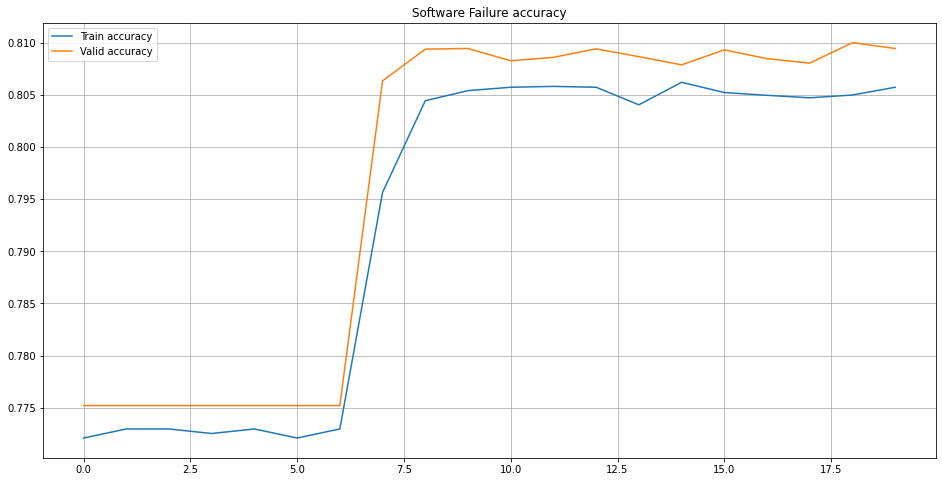

final accuracy: train: 0.8057394623756409, valid: 0.8094599843025208


In [55]:
#TRAINING 
whole_train_valid_cycle(little_model, 20, 'Software Failure')

# Predictions

In [56]:
#TEST preparation
test_prep = test.drop(['id'], axis=1)
test_prep['defects'] = 0

In [57]:
X_prep = test_prep.drop(['defects'], axis=1)
y_prep = test_prep['defects']

In [58]:
X_prep.shape, y_prep.shape

((67842, 16), (67842,))

In [59]:
#Applying transformers
test_x_tf = torch.from_numpy(transformer.fit_transform(X_prep))
test_y_tns = torch.tensor(y_prep.values).unsqueeze(dim=1)

In [60]:
test_x_tf.shape, test_y_tns.shape

(torch.Size([67842, 16]), torch.Size([67842, 1]))

In [61]:
#Dataloader for test data
test_dataset = TensorDataset(test_x_tf, test_y_tns)

test_loader = DataLoader(test_dataset, batch_size=64, pin_memory=True, shuffle=False) #, shuffle=True

In [62]:
test_dataset[0]

(tensor([ 0.2333,  0.4704, -0.6195,  0.5401,  0.5375, -0.3101,  0.6453,  0.2813,
          0.6174,  0.6171,  0.5721, -0.5824,  0.1544, -0.2974,  1.4256,  0.5302],
        dtype=torch.float64),
 tensor([0]))

In [63]:
#Prediction function
@torch.inference_mode()
def predict(model, loader, device): #-> tuple[float, float]:
    
    model.eval()

    output_tensor = []

    for x, y in loader:
         
        x, y = x.to(device), y.to(device)
        
        x, y = x.float(), y.float()    

        output = model(x)
        
        output_sigm = torch.sigmoid(output)
        
        output_tensor.append(output_sigm)

    output_tensor = torch.cat(output_tensor).squeeze(1)   
    output_tensor = output_tensor.cpu()
    
    return output_tensor

In [64]:
out = predict(little_model, test_loader, device)

In [65]:
out

tensor([0.3118, 0.2688, 0.5322,  ..., 0.1669, 0.1190, 0.5322])

In [66]:
test = test.reset_index(drop=True)

In [67]:
test['defects'] = np.array(out)

In [68]:
res = test[['id', 'defects']]
res.to_csv('submission.csv', index=False)  

In [69]:
pd.read_csv('submission.csv')

,id,defects
0,101763,0.311820
1,101764,0.268756
2,101765,0.532163
3,101766,0.510980
4,101767,0.147905
...,...,...
67837,169600,0.202368
67838,169601,0.142562
67839,169602,0.166891
67840,169603,0.118967
